# Learning Algorothm

The agent is trained using an algorithm based on multi-agent deep deterministic policy gradient (MADDPG) (https://arxiv.org/abs/1706.02275). MADDPG is an adaptation of the actor-critic method, which was modified to take into account the action policies of other agents and learn policies that require complex multi-agent coordination. The actors determine their actions based only on their own local obeservations while the critics estimate the discounted cumulative rewards of the actors based on the actions and observations of all actors. The agent model in this project differs from the original paper in that it uses one central critic network that is shared between all actors instead of one critic for each actor with the expectation that it will speed up learning. The experience, which consists of state, actions, reward, next state, and a flag indicating the end of the episode, is added to the replay buffer every step. The local actor and critic models are updated 10 times every 20 steps using experiences randomly sampled from the replay buffer. The target actor and critic models are used to compute the target cumulative reward and are updated slowly using soft update to staiblize learning. In order to promote exploration, noise sampled from a Gaussian distribution is added to the action values generated by the local actor. The standard deviation of the Gaussian distribution is decreased every step so that the action values are generated more deterministically as the actor improves its ability to choose the optimal action values.

### Hyperparameters

The following hyperparameter values were chosen:

- replay buffer size = 1e6
- minibatch size = 1024
- discount factor = 0.99
- parameter for controlling soft update (TAU) = 1e-3 
- learning rate of the actor = 1e-4
- learning rate of the critic = 1e-3
- weight decay = 0
- noise decay = 0.995

# Model Architecture

The actor model consists of an input layer, one hidden layer, and an output layer. The hidden layer is a 256-unit fully-connected layer with ReLU activation. The output layer has two outputs, which correspond to the two action values, with a tanh activation.

The critic model consists of an input layer, three hidden layers, and an output layer. The first hidden layer is a 256-unit fully-connected layer, which takes the concatenated states of the two actors as its input. The second hidden layer is a 256-unit fully-connected layer, which takes the concatenated actions of the two actors and the output of the first hidden layer as its input. The third hidden layer is a 128-unit fully-connected layer. All of the hidden layers use leaky ReLU as their activation function. The output layer has two outputs, which correspond to the estimated discounted cumulative rewards of the two actors.

The final layer weights and biases of both the actor and critic models are initialized from a uniform distribution $U(-3e^{-3}, 3e^{-3})$ to ensure the initial outputs for the actor and critic were near zero. The other layers were initialized from uniform distributions $U(-1/\sqrt{f}, 1/\sqrt{f})$ where $f$ is the fan-in of the layer.

# Experimental Results

The plot of scores per episode during training is shown below. It took 2743 episodes to solve the environment.

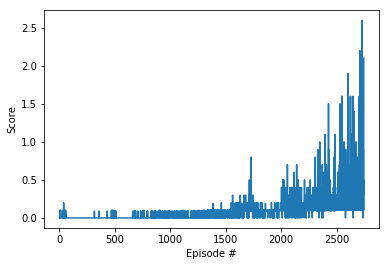

# Future ideas for improving the agent's performance

- Fine tune the number of layers and units of the actor and critic networks.
- Fine tune hyperparameters, in particular the number of steps it waits to update the network and the number of updates.
- It seems that the networks aren't learning much for the first five hundred to thousand steps. Perhaps using prioritized experience replay might help speed up learning.
- Using multi-step Q-learning for the critic network might help the critic learn faster.